## Ejercicio 22

Elija su lugar favorito en el mundo y tome su latitud y longitud, ¿cuál es el título de la
página de wikipedia más cercana?\

Ubicacion elegida: New York\
*Latitud*:  40.767433\
*Longitud*: -73.976146

In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
geo_tags = pd.read_csv('geo_tags.csv')
geo_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556393 entries, 0 to 556392
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   gt_id       556393 non-null  int64  
 1   gt_page_id  556393 non-null  int64  
 2   gt_globe    556393 non-null  object 
 3   gt_primary  556393 non-null  int64  
 4   gt_lat      556393 non-null  float64
 5   gt_lon      556393 non-null  float64
 6   gt_dim      556393 non-null  int64  
 7   gt_type     449893 non-null  object 
 8   gt_name     72557 non-null   object 
 9   gt_country  79192 non-null   object 
 10  gt_region   3088 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 46.7+ MB


In [4]:
content_text =pd.read_csv('contents_text_sample.csv')
content_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206607 entries, 0 to 206606
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      206607 non-null  int64 
 1   title   206607 non-null  object
 2   text    206600 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.7+ MB


In [5]:
# El lugar elegido para el ejercicio es New York
lat_ny = 40.767433
lon_ny = -73.976146

Las columnas de geo_tags que voy a necesitar para resolver el ejercicio son gt_id,gt_lat,gt_lon.\
Las columnas de content que necesitaré son id, text.

In [6]:
geo_needed_data = geo_tags[['gt_page_id','gt_lat','gt_lon']]
geo_needed_data.count()

gt_page_id    556393
gt_lat        556393
gt_lon        556393
dtype: int64

In [7]:
# Verifico que no haya duplicados.
geo_needed_data.drop_duplicates()
geo_needed_data.count()

gt_page_id    556393
gt_lat        556393
gt_lon        556393
dtype: int64

Como podemos ver, el dataframe se encuentra limpio y sin duplicados.\
Para obtener la ubicacion mas cercana a la elegida, lo que haré es restar los valores de las latitudes y las longitudes con los valores que tengo de New York, luego sumar sus módulos de manera que la suma minima será la ubicacion mas cercana.

In [8]:
latitudes = geo_needed_data['gt_lat'].copy()
latitudes

0         41.507500
1         13.738000
2         13.702000
3         13.400000
4         12.850000
            ...    
556388     3.450000
556389    30.815839
556390    46.953333
556391    45.109659
556392    15.425675
Name: gt_lat, Length: 556393, dtype: float64

In [9]:
dif_latitudes = abs(latitudes - lat_ny)
dif_latitudes

0          0.740067
1         27.029433
2         27.065433
3         27.367433
4         27.917433
            ...    
556388    37.317433
556389     9.951594
556390     6.185900
556391     4.342226
556392    25.341758
Name: gt_lat, Length: 556393, dtype: float64

In [10]:
longitudes = geo_needed_data['gt_lon'].copy()
dif_longitudes = abs(longitudes - lon_ny)
dif_longitudes

0          68.158646
1          15.315854
2          15.231854
3          15.773854
4          14.023854
             ...    
556388      2.557187
556389    119.972215
556390     80.233090
556391     81.617367
556392     16.350139
Name: gt_lon, Length: 556393, dtype: float64

In [11]:
distancia_a_ny = dif_longitudes + dif_latitudes
distancia_a_ny

0          68.898713
1          42.345287
2          42.297288
3          43.141287
4          41.941287
             ...    
556388     39.874620
556389    129.923810
556390     86.418991
556391     85.959594
556392     41.691897
Length: 556393, dtype: float64

La columna de distancia_a_ny será la que me determinaá que id necesito.

In [12]:
geo_needed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556393 entries, 0 to 556392
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   gt_page_id  556393 non-null  int64  
 1   gt_lat      556393 non-null  float64
 2   gt_lon      556393 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.7 MB


In [13]:
# Agrego la columna al dataframe con el que trabajo
geo_needed_data.insert(loc=3,column="dis_ny",value=distancia_a_ny)
geo_needed_data.head()

,gt_page_id,gt_lat,gt_lon,dis_ny
0,4328020,41.5075,-5.8175,68.898713
1,4670424,13.7380,-89.2920,42.345287
2,4670424,13.7020,-89.2080,42.297288
3,4670424,13.4000,-89.7500,43.141287
4,4670424,12.8500,-88.0000,41.941287


Ahora tengo los valores de las distancias, por lo que prosigo a combinar ambos archivos de manera que el resultado dependerá de la coexistencia de ambos valores 

In [29]:
# Cambio el nombre de gt_page_id a id para unificar ambos archivos
geo_needed_data.rename(columns={'gt_page_id':'id'})

,id,gt_lat,gt_lon,dis_ny
0,4328020,41.507500,-5.817500,68.898713
1,4670424,13.738000,-89.292000,42.345287
2,4670424,13.702000,-89.208000,42.297288
3,4670424,13.400000,-89.750000,43.141287
4,4670424,12.850000,-88.000000,41.941287
...,...,...,...,...
556388,5239183,3.450000,-76.533333,39.874620
556389,104468,30.815839,45.996069,129.923810
556390,968281,46.953333,6.256944,86.418991
556391,79985,45.109659,7.641221,85.959594


In [31]:
unified_data = content_text.merge(geo_needed_data)
unified_data.head()

,id,title,text,gt_lat,gt_lon,dis_ny
0,487,Canarias,{{Portal asociado|Canarias}}\n{{otros usos}}\n...,28.536000,-15.749000,70.458579
1,972,España,{{otros usos}}\n{{redirige aquí|Estado español...,40.418889,-3.691944,70.632746
2,972,España,{{otros usos}}\n{{redirige aquí|Estado español...,28.271389,-16.643611,69.828579
3,972,España,{{otros usos}}\n{{redirige aquí|Estado español...,37.053333,-3.311389,74.378857
4,972,España,{{otros usos}}\n{{redirige aquí|Estado español...,42.632222,0.657778,76.498713


In [32]:
# Busco aquella localización mas cercana a New York
data = unified_data.nsmallest(1,"dis_ny")
data

,id,title,text,gt_lat,gt_lon,dis_ny
5912,2199712,Hotel Plaza,{{otros usos}}\n{{Ficha de NRHP\n| nombre ...,40.764528,-73.974444,0.004607


Podemos ver que la busqueda mas cercana fue la 2199712, cuya ubicacion se encuentra en: \
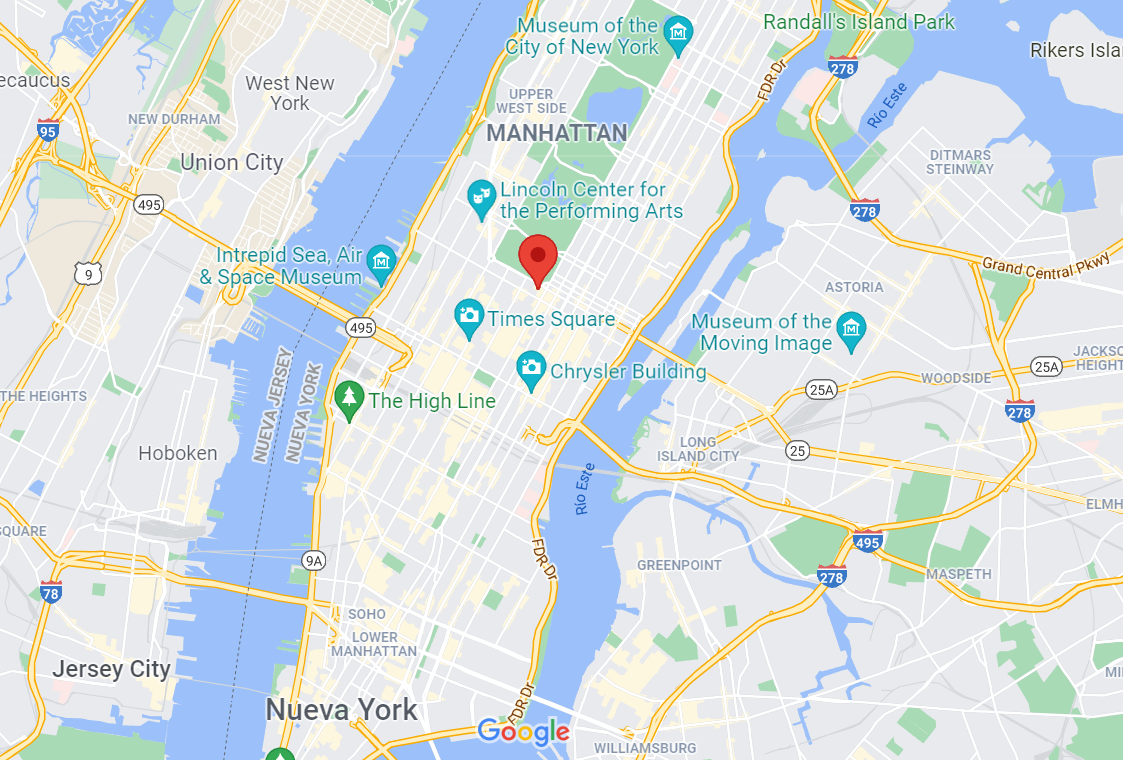\
Donde el título es #España\
Lo cual nos indica una resolución correcta.